#### Logistic Regression | Preparing & Creating Model On Titanic Dataset 



In [46]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
from pylab import rcParams 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 


%matplotlib inline 
rcParams['figure.figsize'] = 5, 4 
sb.set_style('whitegrid') 



df = pd.read_csv('titanic.csv')
df.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
# check missing values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
# Drop Irrelivant columns
df_data = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
df_data.head()







,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [50]:
# Let's get the average age based on Parch
import warnings
warnings.filterwarnings('ignore')

parch_groups = df_data.groupby(df_data['Parch'])
parch_groups.mean()


,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


##### Treat Missing Values

In [51]:
# Treat Missing Values - Creating the Function based on Age and Parch
def fill_missing_age(row):
    if pd.isnull(row['Age']):
        if row['Parch'] == 0:
            return 32
        elif row['Parch'] == 1:
            return 24
        elif row['Parch'] == 2:
            return 17
        elif row['Parch'] == 3:
            return 33
        elif row['Parch'] == 4:
            return 44
        elif row['Parch'] == 5:
            return 39
        elif row['Parch'] == 6:
            return 43
    else:
        return row['Age']

df_data['Age'] = df_data[['Age', 'Parch']].apply(fill_missing_age, axis=1) 
df_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [52]:
# Convert categorically data to numerical data like Gender/Sex

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_data.iloc[:, 3] = labelencoder.fit_transform(df_data.iloc[:, 3].values)
df_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


<AxesSubplot: >

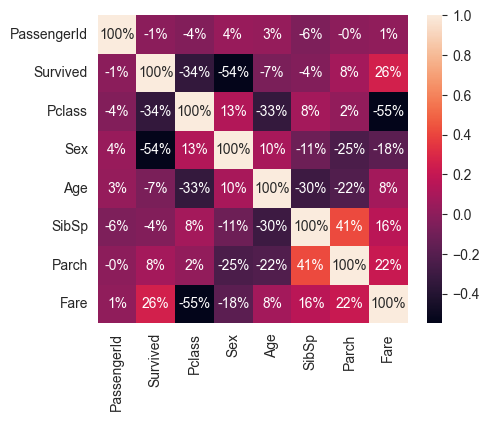

In [53]:
sb.heatmap(df_data.corr(), annot=True, fmt='.0%')



In [54]:
# Let's drop the columns which are not clearly correlated with the target variable
df_data.drop(['Pclass', 'Fare'], axis=1, inplace=True)
df_data.head()



,PassengerId,Survived,Sex,Age,SibSp,Parch
0,1,0,1,22.0,1,0
1,2,1,0,38.0,1,0
2,3,1,0,26.0,0,0
3,4,1,0,35.0,1,0
4,5,0,1,35.0,0,0


#### Let's Build a Model

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['Survived'], axis=1), df_data['Survived'], test_size=0.2, random_state=100)


print(X_train.shape)
print(y_train.shape)


(712, 5)
(712,)


In [56]:

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})[0:5]



,Actual,Predicted
205,0,1
44,1,1
821,1,0
458,1,1
795,0,0


In [57]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.79


In [58]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       104
           1       0.77      0.71      0.74        75

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [59]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv=2, scoring='accuracy')


print('Cross-validated scores:', scores)
print('Average cross-validated score:', scores.mean())


Cross-validated scores: [0.7752809  0.79494382]
Average cross-validated score: 0.7851123595505618


In [60]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(logreg, X_train, y_train, cv=2)
print("Confusion Matrix:", confusion_matrix(y_train, predictions))



Confusion Matrix: [[381  64]
 [ 89 178]]


In [61]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision: ', precision_score(y_train, predictions))
print('Recall: ', recall_score(y_train, predictions))




Precision:  0.7355371900826446
Recall:  0.6666666666666666


In [62]:

# Test Passenger
passenger = np.array([1,0,20,1,0]).reshape(1, -1)


predict     = logreg.predict(passenger)
probability = logreg.predict_proba(passenger)


print('Passenger survived: ', predict)
print('Probability of passenger survived: ', probability)




Passenger survived:  [1]
Probability of passenger survived:  [[0.2777366 0.7222634]]
